In [1]:
!python -m pip install --upgrade --user ortools 

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


### Using 4-vertices clique to demo maxcut algorithm in ortool 

* network visualization 
* graph partition and cut  
* objective function 

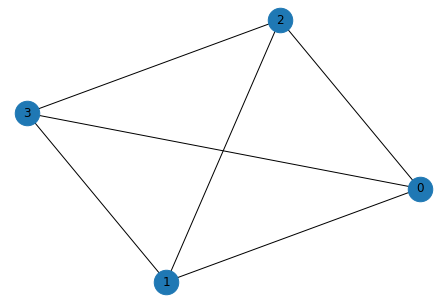

In [80]:
import networkx as nx

n_nodes = 4
p = 1  # probability of an edge
seed = 1967

g = nx.erdos_renyi_graph(n_nodes, p=p, seed=seed)
positions = nx.spring_layout(g, seed=seed)

nx.draw(g, with_labels=True, pos=positions, node_size=600)

In [13]:
from ortools.sat.python import cp_model

In [81]:
model = cp_model.CpModel()
x1 = model.NewIntVar(-1, 1, 'x1')
x2 = model.NewIntVar(-1, 1, 'x2')
x3 = model.NewIntVar(-1, 1, 'x3')
x4 = model.NewIntVar(-1, 1, 'x4')


a = model.NewIntVar(-1, 1, 'a')
b = model.NewIntVar(-1, 1, 'b')
c = model.NewIntVar(-1, 1, 'c')
d = model.NewIntVar(-1, 1, 'd')
e = model.NewIntVar(-1, 1, 'e')
f = model.NewIntVar(-1, 1, 'f')


model.AddMultiplicationEquality(a, [x1, x2])
model.AddMultiplicationEquality(b, [x2, x3])
model.AddMultiplicationEquality(c, [x3, x4])
model.AddMultiplicationEquality(d, [x4, x1])
model.AddMultiplicationEquality(e, [x1, x3])
model.AddMultiplicationEquality(f, [x2, x4])

In [82]:


model.Maximize(1-a + 1-b + 1-c + 1-d + 1-e + 1 - f) 
solver = cp_model.CpSolver()
solution_printer = cp_model.VarArrayAndObjectiveSolutionPrinter([x1, x2, x3, x4])
status = solver.Solve(model, solution_printer)



Solution 0, time = 0.01 s, objective = 0
  x1 = -1   x2 = -1   x3 = -1   x4 = -1 
Solution 1, time = 0.01 s, objective = 4
  x1 = -1   x2 = 1   x3 = -1   x4 = -1 
Solution 2, time = 0.01 s, objective = 8
  x1 = -1   x2 = 1   x3 = -1   x4 = 1 


In [53]:
print (solver.StatusName(status))

OPTIMAL


### Max cut over n-vertices graph

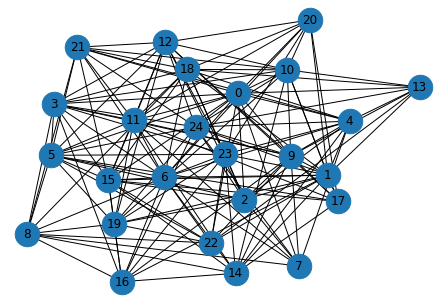

In [162]:
import networkx as nx

n_nodes = 25
p = 0.5  # probability of an edge
seed = 1967

g = nx.erdos_renyi_graph(n_nodes, p=p, seed=seed)
positions = nx.spring_layout(g, seed=seed)

nx.draw(g, with_labels=True, pos=positions, node_size=600)

In [163]:
edges = nx.to_numpy_matrix(g)

In [164]:
edges = edges.tolist()
edges

[[0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0],
 [0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0],
 [1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
 

In [165]:
model = cp_model.CpModel()

nodes = [None for i in range(0, n_nodes)] 
for i in range(0, n_nodes): 
    name = "x"+str(i)
    nodes[i] = model.NewIntVar(-1, 1, name)

optvar = [[None for i in range(0, n_nodes)] for j in range(0, n_nodes)]     
for j in range(0, n_nodes):
    for i in range(0, n_nodes):
        if j > i:
            name = "x{}x{}".format(str(i), str(j))
            optvar[i][j] = model.NewIntVar(-1, 1, name)
            model.AddMultiplicationEquality( optvar[i][j], [nodes[i], nodes[j]])
    


In [166]:
def objective(optvar, edges, n_nodes):
    exp = None 
    for j in range(0, n_nodes): 
        for i in range(0, n_nodes): 
            if j > i and edges[i][j] > 0: 
                if exp == None: 
                    exp = (1 - optvar[i][j]*int(edges[i][j]))
                else:
                    exp += (1 - optvar[i][j]*int(edges[i][j])) 
    return exp         

In [167]:
model.Maximize(objective(optvar, edges, n_nodes))

In [169]:
%%time
solver = cp_model.CpSolver()
solution_printer = cp_model.VarArrayAndObjectiveSolutionPrinter(nodes)
solver.parameters.num_search_workers = 12
status = solver.Solve(model, solution_printer)

Solution 0, time = 0.41 s, objective = 0
  x0 = 1   x1 = 1   x2 = 1   x3 = 1   x4 = 1   x5 = 1   x6 = 1   x7 = 1   x8 = 1   x9 = 1   x10 = 1   x11 = 1   x12 = 1   x13 = 1   x14 = 1   x15 = 1   x16 = 1   x17 = 1   x18 = 1   x19 = 1   x20 = 1   x21 = 1   x22 = 1   x23 = 1   x24 = 1 
Solution 1, time = 0.42 s, objective = 15
  x0 = 0   x1 = 1   x2 = 1   x3 = 1   x4 = 1   x5 = 1   x6 = 1   x7 = 1   x8 = 1   x9 = 1   x10 = 1   x11 = 1   x12 = 1   x13 = 1   x14 = 1   x15 = 1   x16 = 1   x17 = 1   x18 = 1   x19 = 1   x20 = 1   x21 = 1   x22 = 1   x23 = 1   x24 = 1 
Solution 2, time = 0.43 s, objective = 153
  x0 = 0   x1 = 0   x2 = 0   x3 = 0   x4 = 0   x5 = 0   x6 = 0   x7 = 0   x8 = 0   x9 = 0   x10 = 0   x11 = 0   x12 = 0   x13 = 0   x14 = 0   x15 = 0   x16 = 0   x17 = 0   x18 = 0   x19 = 0   x20 = 0   x21 = 0   x22 = 0   x23 = 0   x24 = 0 
Solution 3, time = 0.44 s, objective = 160
  x0 = -1   x1 = -1   x2 = 1   x3 = -1   x4 = -1   x5 = -1   x6 = -1   x7 = -1   x8 = -1   x9 = -1   x10 = -